In [1]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
with open('../secrets.json') as file:
    secrets = json.load(file)
    connection_string = secrets['connection_string']
    
db = create_engine(connection_string)
df = pd.read_sql('SELECT * FROM NAP.article', con=db)

df

,id,post_id,post_title,url,score,publisher,headline,date_published,content
0,1,fra8wl,Top US general resists Trump administration?s ...,https://mondoweiss.net/2020/03/top-u-s-general...,10285,mondoweiss,Top U.S. general resists Trump administration?...,2020-03-28 15:44:00,A brave U.S. army lieutenant general may be ri...
1,2,frcvgj,Experts believe the explosion of coronavirus c...,https://www.si.com/soccer/2020/03/25/atalanta-...,2854,si,Atalanta vs Valencia linked to accelerating co...,2020-03-25 00:00:00,ROME (AP) ? It was the biggest soccer game in ...
2,3,fr5uqd,Boris Johnson's government is reportedly furio...,https://www.businessinsider.com/coronavirus-bo...,79397,businessinsider,Boris Johnson's government is reportedly furio...,2020-03-29 00:00:00,"UK government officials say there'll be ""recko..."
3,4,fr7uzc,Toyota Gearing Up To Build Ventilators And Fac...,https://www.carscoops.com/2020/03/toyota-geari...,4988,carscoops,Toyota Gearing Up To Build Ventilators And Fac...,2020-03-27 22:36:00,"The United States will soon have over 100,000 ..."
4,5,frbkqr,Prime Minister Justin Trudeau says Health Cana...,https://www.ctvnews.ca/health/coronavirus/trud...,2341,ctvnews,Trudeau vows 'no corners cut' in accepting mas...,2020-03-29 13:04:00,TORONTO -- Prime Minister Justin Trudeau says ...
...,...,...,...,...,...,...,...,...,...
867,884,gfbygc,A Broadband Engineer Was Spat on by a 5G Consp...,https://www.vice.com/en_us/article/4ayg8g/a-br...,43453,vice,A Broadband Engineer Was Spat on by a 5G Consp...,2020-05-07 15:16:09,Want the best of VICE News straight to your in...
868,885,gf8z7p,Taiwan refuses to deport caregiver who ‘insult...,https://globalvoices.org/2020/05/07/taiwan-ref...,4066,globalvoices,Taiwan refuses to deport caregiver who ‘insult...,2020-05-07 00:00:00,Taiwan has rejected the request of a Philippin...
869,886,gfb7eu,Sweden admits a 'big failure' to prevent elder...,https://www.msn.com/en-gb/health/medical/swede...,2208,msn,Sweden admits a 'big failure' to prevent elder...,None,© Getty The Swedish flag in Gothenburg The num...
870,887,gfe0g8,Trump says he's sending ventilators to Russia ...,https://www.businessinsider.com/trump-is-givin...,992,businessinsider,Trump says he's sending ventilators to Russia ...,2020-05-07 00:00:00,President Donald Trump said he would send vent...


In [3]:
headlines = df[:15]['headline']
headlines

0     Top U.S. general resists Trump administration?...
1     Atalanta vs Valencia linked to accelerating co...
2     Boris Johnson's government is reportedly furio...
3     Toyota Gearing Up To Build Ventilators And Fac...
4     Trudeau vows 'no corners cut' in accepting mas...
5     Endangered sea turtles hatch on Brazil's deser...
6     Edward Snowden says COVID-19 could give govern...
7     UN Environment Chief Warns ?Nature is Sending ...
8     'So easy I thought it was fake': CRA’s CERB sy...
9     Wimbledon paid pandemic insurance for almost 2...
10    Pope condemns those trying to make quick buck ...
11    US intelligence warned in November that corona...
12    Donald Trump sends 200 ventilators to the UK a...
13    Iran ‘hides 500,000 virus cases,’ says member ...
14                                     Are you a robot?
Name: headline, dtype: object

In [4]:
for headline in headlines:
    blob = TextBlob(headline)
    print(f'{headline}: {round(blob.sentiment.polarity, 2)}')

Top U.S. general resists Trump administration?s efforts to provoke war with Iran ? Mondoweiss: 0.28
Atalanta vs Valencia linked to accelerating coronavirus spread: 0.0
Boris Johnson's government is reportedly furious with China and believes it could have 40 times more coronavirus cases than it claims: 0.5
Toyota Gearing Up To Build Ventilators And Face Shields As Mercedes Offers Use Of 3D Printers: 0.1
Trudeau vows 'no corners cut' in accepting masks, other supplies from China: -0.12
Endangered sea turtles hatch on Brazil's deserted beaches: 0.0
Edward Snowden says COVID-19 could give governments invasive new data-collection powers that could last long after the pandemic: 0.03
UN Environment Chief Warns ?Nature is Sending Us a Message? Through The Coronavirus Pandemic: 0.0
'So easy I thought it was fake': CRA’s CERB system gets stellar reviews in first days of operation: 0.11
Wimbledon paid pandemic insurance for almost 20 years. Now it’s getting $141 million: 0.0
Pope condemns those t

In [5]:
blob1 = TextBlob('I think this is good')
blob2 = TextBlob('He won the race')

print(blob1.sentiment)
print(blob2.sentiment)

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)


In [6]:
polarities = []
subjectivities = []

for i in range(len(df)):
    headline = df.iloc[i]['headline']
    blob = TextBlob(headline)
    
    polarities.append(blob.sentiment.polarity)
    subjectivities.append(blob.sentiment.subjectivity)

In [7]:
df['polarity'] = polarities
df['subjectivity'] = subjectivities

In [8]:
df.describe()

,id,score,polarity,subjectivity
count,872.000000,872.000000,872.000000,872.000000
mean,452.145642,5343.966743,0.008862,0.228747
std,252.476279,13368.961003,0.210991,0.293094
min,1.000000,0.000000,-1.000000,0.000000
25%,234.750000,17.000000,0.000000,0.000000
50%,452.500000,498.000000,0.000000,0.000000
75%,670.250000,2855.500000,0.000000,0.438163
max,888.000000,91149.000000,1.000000,1.000000


In [9]:
positive = df[df['polarity'] > 0.01].reset_index(drop=True)
neutral = df[(df['polarity'] >= -0.01) & (df['polarity'] <= 0.01)].reset_index(drop=True)
negative = df[df['polarity'] < -0.01].reset_index(drop=True)

print(f'Positive: {len(positive)}')
print(f'Neutral: {len(neutral)}')
print(f'Negative: {len(negative)}')

Positive: 213
Neutral: 487
Negative: 172


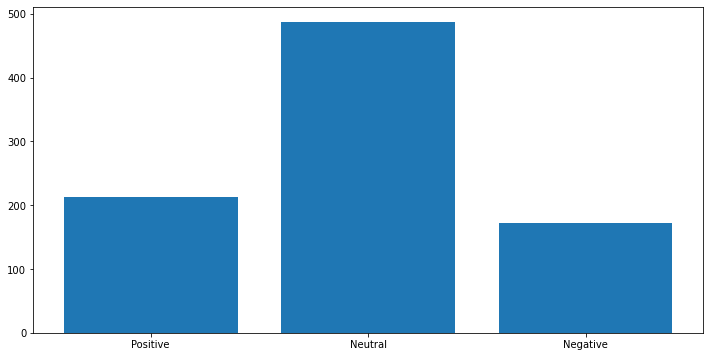

In [10]:
counts = [len(positive), len(neutral), len(negative)]
labels = ['Positive', 'Neutral', 'Negative']

plt.figure(figsize=(12,6))
plt.bar(labels, counts)
plt.show()

# Average subjectivity broken down by sentiment

Average subjectivity for positive headlines

In [11]:
sum(positive['subjectivity']) / len(positive)

0.46429615741587554

Average subjectivity for neutral headlines

In [12]:
sum(neutral['subjectivity']) / len(neutral)

0.0474106939148007

Average subjectivity for negative headlines

In [13]:
sum(negative['subjectivity']) / len(negative)

0.4504862439455462

In [14]:
sorted_df = df.sort_values('polarity')
sorted_df

,id,post_id,post_title,url,score,publisher,headline,date_published,content,polarity,subjectivity
195,212,g159eh,Cruel Bear Bile Industry Thrives Despite Pande...,http://www.guelphnow.ca/npps/story.cfm?nppage=...,28,guelphnow,Cruel Bear Bile Industry Thrives Despite Pande...,None,Bears caged so bile can be extracted from thei...,-1.000,1.00
16,24,fz3fb1,UK Health secretary Matt Hancock is facing a g...,https://www.independent.co.uk/news/uk/politics...,37301,independent,Coronavirus: Lack of PPE ‘shocking indictment’...,2020-04-11 09:23:00,Health secretary Matt Hancock is facing a grow...,-1.000,1.00
65,82,g1dlv1,"Fearful of virus return, Beijing turns into vi...",https://www.afp.com/en/news/3954/fearful-virus...,186,afp,"Fearful of virus return, Beijing turns into vi...",None,AFP/File / NICOLAS ASFOURI Beijing's coronavir...,-0.900,1.00
471,488,g165fw,"Fearful of COVID-19 return, Beijing turns into...",https://www.channelnewsasia.com/news/asia/covi...,0,channelnewsasia,"Fearful of COVID-19 return, Beijing turns into...",None,BEIJING: Beijing has virtually walled itself o...,-0.900,1.00
862,879,gf00ia,China Vows To Brutally Crush Hong Kong Pro-Dem...,https://eurasiantimes.com/china-vows-to-brutal...,37216,eurasiantimes,China Vows To Brutally Crush Hong-Kong Protesters,2020-05-06 14:33:28,"The tensions between China and Taiwan, so the ...",-0.875,1.00
...,...,...,...,...,...,...,...,...,...,...,...
554,571,g339pa,A 16-year-old Iranian chess prodigy has upende...,https://www.cnn.com/2020/04/17/sport/alireza-f...,35701,cnn,16-year-old Iranian shocks chess world no.1 Ma...,2020-04-17 00:00:00,(CNN) A 16-year-old Iranian chess prodigy has ...,0.800,0.40
249,266,g13l8h,"'Tomorrow will be a good day': Briton, 99, rai...",https://uk.reuters.com/article/uk-health-coron...,19,reuters,"'They are brave': Briton, 99, raises millions ...",2020-04-14 15:34:52,LONDON (Reuters) - A 99-year-old war veteran h...,0.800,1.00
859,876,geut91,Nobel Prize winner 'greatly saddened' his name...,https://www.abc.net.au/news/2020-05-07/coronac...,1446,abc,Nobel Prize winner 'greatly saddened' his name...,2020-05-07 00:00:00,As the world grapples with an unprecedented he...,0.800,0.75
519,536,g1nm5f,Germany says WHO is one of best investments af...,https://www.reuters.com/article/us-health-coro...,5729,reuters,Germany says WHO is one of best investments af...,2020-04-15 11:09:26,FILE PHOTO: German Foreign Minister Heiko Maas...,1.000,0.30


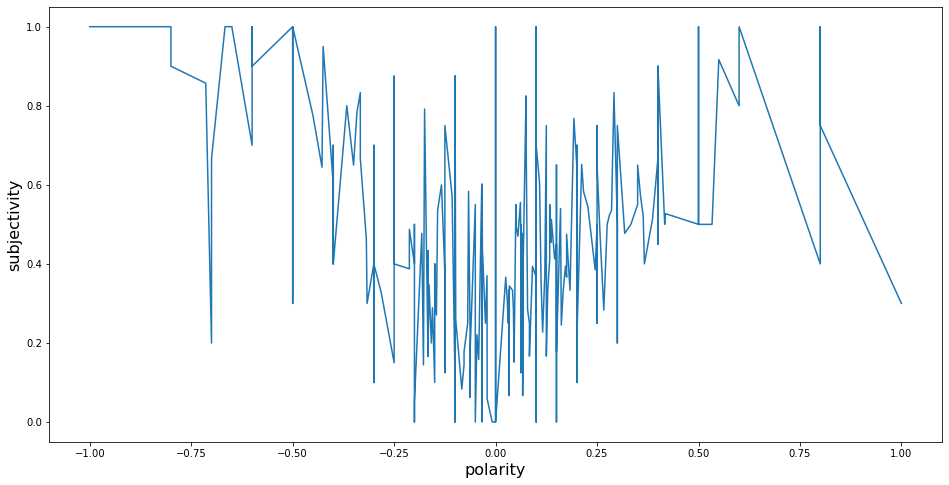

In [15]:
plt.figure(figsize=(16,8))
plt.plot(sorted_df['polarity'], sorted_df['subjectivity'])
plt.xlabel('polarity', fontsize=16)
plt.ylabel('subjectivity', fontsize=16)
plt.show()